In [ ]:
!pip install nltk

In [5]:
# imports the essential libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [6]:
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML Project Dataset/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Content,Title,Type
0,0,new york reuters us environmental group sierra...,politicsNews,true
1,1,washington reuters us air force asked industry...,politicsNews,true
2,2,saturday paul ryan posted photo instagram phot...,News,fake
3,3,america keeps waiting word hillary indicted ob...,politics,fake
4,4,religion peace ht weasel zippers,left-news,fake


In [8]:
# Display the last few rows of the DataFrame
df.tail()

,Unnamed: 0,Content,Title,Type
44893,44893,new york reuters myanmar national security adv...,worldnews,true
44894,44894,reckless hillary cared less seriousness exposi...,politics,fake
44895,44895,montevideo reuters lucia topolansky uruguay se...,worldnews,true
44896,44896,donald trump getting heavy media coverage late...,News,fake
44897,44897,jakarta reuters indonesian security forces eas...,worldnews,true


In [9]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 4)

In [10]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   Content     44266 non-null  object
 2   Title       44898 non-null  object
 3   Type        44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [11]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Unnamed: 0      0
Content       632
Title           0
Type            0
dtype: int64

In [12]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Fill missing values in 'Content' column with an empty string
df['Content'].fillna('', inplace=True)

# Fill missing values in 'Type' column with the mode
mode_value = df['Type'].mode()[0]
df['Type'].fillna(mode_value, inplace=True)

In [13]:
df.isnull().sum()

Unnamed: 0    0
Content       0
Title         0
Type          0
dtype: int64

In [14]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
df.describe()


Summary statistics of numerical columns:


,Unnamed: 0
count,44898.00000
mean,22448.50000
std,12961.08053
min,0.00000
25%,11224.25000
50%,22448.50000
75%,33672.75000
max,44897.00000


In [15]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['Type'].unique()


Unique values in the 'type' column:


array(['true', 'fake'], dtype=object)

In [16]:
df.columns

Index(['Unnamed: 0', 'Content', 'Title', 'Type'], dtype='object')

**Clean the text data**

In [ ]:
# Define a function to clean and preprocess text data
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Remove HTML tags
        text = re.sub(r'<[^>]+>', '', text)

        # Remove punctuations using regex
        text = re.sub(r'[^\w\s]', '', text)

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

        # Join the tokens back into a single string
        clean_text = ' '.join(lemmatized_tokens)

        return clean_text
    else:
        return ''

# Apply the clean_text function to the 'Content' column
df['clean_content'] = df['Content'].apply(clean_text)


In [ ]:
df.head()

,Unnamed: 0,Content,Title,Type,clean_content
0,0,new york reuters us environmental group sierra...,politicsNews,True,new york reuters u environmental group sierra ...
1,1,washington reuters us air force asked industry...,politicsNews,True,washington reuters u air force asked industry ...
2,2,saturday paul ryan posted photo instagram phot...,News,Fake,saturday paul ryan posted photo instagram phot...
3,3,america keeps waiting word hillary indicted ob...,politics,Fake,america keep waiting word hillary indicted oba...
4,4,religion peace ht weasel zippers,left-news,Fake,religion peace ht weasel zipper


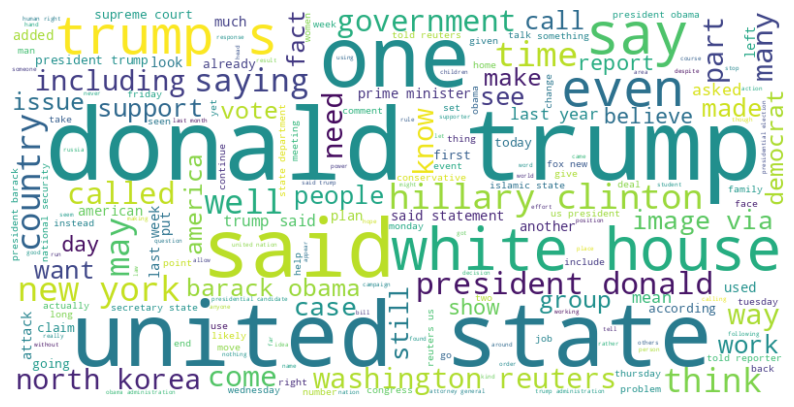

In [ ]:
# Combine all text data into a single string
text = ' '.join(df['Content'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit TF-IDF vectorizer and transform 'Content' column
tfidf_features = tfidf_vectorizer.fit_transform(df['Content'])

# Convert TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df.head()

,10,100,11,12,13,14,15,16,18,20,...,working,world,would,wrong,wrote,year,years,yet,york,young
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.029329,0.000000,0.062468,0.00000,0.000000,0.0,0.054468,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.023432,0.000000,0.000000,0.03372,0.068312,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.112013,0.099803,0.00000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.044557,0.0,0.044662,0.0,0.0,...,0.0,0.0,0.102800,0.000000,0.036492,0.00000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0
